In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
feature_set = np.array([[0,1,0],[0,0,1],[1,0,0],[1,1,0],[1,1,1]])
labels = np.array([[1,0,0,1,1]]).T

In [3]:
labels

array([[1],
       [0],
       [0],
       [1],
       [1]])

In [4]:
np.random.seed(42)
weights1 = np.random.rand(3,2)
bias1 = float(np.random.rand(1))
lr = 0.05

In [5]:
print(weights1)
print(bias1)

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]]
0.05808361216819946


In [6]:
float(np.random.rand(1))

0.8661761457749352

In [7]:
weights2 = np.random.rand(2,1)
bias2 =float(np.random.rand(1))
print(weights2)
print(bias2)

[[0.60111501]
 [0.70807258]]
0.020584494295802447


In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [9]:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

In [10]:
ep=5000

In [11]:
errors=[]

In [12]:
for epoch in range(ep):
    inputs = feature_set
    # 1 layer
    #feedforward step2
    layer1 = sigmoid(np.dot(inputs, weights1) + bias1)
    # 2 layer
    layer2 = sigmoid(np.dot(layer1, weights2) + bias2)
    # backpropagation step 1
    error = layer2 - labels
    print(error.sum())
    errors.append(error.sum())
    # backpropagation step 2
    layer2_delta = error * sigmoid_der(layer2)
    layer1_delta = layer2_delta.dot(weights2.T) * sigmoid_der(layer1)
    weights2 -= lr * layer1.T.dot(layer2_delta)
    weights1 -= lr * inputs.T.dot(layer1_delta)
    for num in layer2_delta:
        bias2 -= lr * num
    for num in layer1_delta:
        bias1 -= lr * num

0.5953742453303464
0.5843242887995651
0.573476864317707
0.5628312609766813
0.5523865909032547
0.5421417994958025
0.5320956754811482
0.52224686076656
0.5125938600651424
0.5031350502758537
0.4938686896022333
0.4847929263965648
0.47590580771869573
0.4672052876010385
0.4586892350134011
0.4503554415232599
0.4422016286488719
0.43422545490424247
0.4264245225364358
0.41879638395703267
0.4113385478707019
0.4040484851048963
0.3969236341455965
0.3899614063847958
0.38315919108612717
0.3765143600755728
0.370024272164708
0.36368627731430114
0.35749772054640727
0.35145594561333915
0.34555829843205865
0.33980213029265127
0.3341848008496059
0.3287036809046223
0.32335615498965165
0.31813962375879123
0.31305150619756505
0.30808924165798135
0.3032502917276102
0.29853214194074484
0.2939323033395186
0.28944831389264536
0.28507773977922357
0.2808181765448259
0.27666725013685467
0.27262261782591046
0.26868196901966457
0.2648430259755026
0.26110354441794115
0.25746131406659
0.253914159080184
0.2504599384219749

0.14767696807647446
0.14751762637173882
0.14735761536468106
0.14719693799250033
0.1470355972130889
0.14687359600492889
0.14671093736698415
0.14654762431859525
0.1463836598993663
0.14621904716905754
0.1460537892074696
0.14588788911433093
0.1457213500091804
0.1455541750312529
0.14538636733935784
0.14521793011175832
0.14504886654605031
0.1448791798590393
0.14470887328661275
0.14453795008361592
0.14436641352372237
0.1441942668993038
0.14402151352129966
0.14384815671908324
0.1436741998403276
0.14349964625086842
0.1433244993345696
0.1431487624931811
0.14297243914619973
0.14279553273072587
0.14261804670132194
0.14243998452986706
0.1422613497054076
0.1420821457340139
0.14190237613862744
0.14172204445891023
0.14154115425109315
0.14135970908782314
0.14117771255800582
0.14099516826664904
0.140812079834708
0.1406284508989195
0.14044428511164775
0.14025958614071676
0.14007435766924947
0.13988860339550213
0.13970232703269625
0.13951553230885305
0.13932822296662128
0.13914040276311024
0.1389520754697

0.04352218287519011
0.04344628485974489
0.04337061950739732
0.04329518601963478
0.043219983599917966
0.04314501145368771
0.043070268788374055
0.0429957548134039
0.042921468740207414
0.04284740978222895
0.042773577154928355
0.04269997007579435
0.04262658776434691
0.042553429442145296
0.042480494332794216
0.04240778166195153
0.04233529065733177
0.04226302054871289
0.04219097056794435
0.04211913994894739
0.04204752792772637
0.041976133742369415
0.04190495663305316
0.04183399584205352
0.04176325061374209
0.0416927201945958
0.041622403833199983
0.04155230078025163
0.041482410288564586
0.04141273161307196
0.041343264010831104
0.04127400674102577
0.041204959064970514
0.04113612024611246
0.04106748955003625
0.040999066244464644
0.04093084959926285
0.040862838886441155
0.04079503338015489
0.04072743235671039
0.04066003509456351
0.04059284087432541
0.04052584897876005
0.040459058692788874
0.04039246930349222
0.04032608010010888
0.040259890374039625
0.0401938994188471
0.04012810653025761
0.040062

0.020112106601990684
0.020096695238466467
0.020081310979230133
0.020065953753077764
0.020050623489044545
0.020035320116403327
0.020020043564663637
0.020004793763570977
0.01998957064310622
0.01997437413348363
0.01995920416515179
0.01994406066879023
0.01992894357531054
0.01991385281585485
0.019898788321794342
0.019883750024728974
0.019868737856486934
0.019853751749122323
0.019838791634916392
0.019823857446373994
0.01980894911622591
0.019794066577424385
0.019779209763144984
0.019764378606785843
0.019749573041963397
0.01973479300251621
0.01972003842250067
0.019705309236191293
0.019690605378080095
0.019675926782875997
0.019661273385502345
0.019646645121098788
0.019632041925017607
0.019617463732824192
0.019602910480296387
0.019588382103423882
0.019573878538407058
0.019559399721654963
0.019544945589786478
0.019530516079628968
0.019516111128215996
0.019501730672788375
0.019487374650793116
0.01947304299988123
0.01945873565790804
0.019444452562933007
0.019430193653217465
0.019415958867224622
0.0

0.014229646572356536
0.014222791199058032
0.014215943646138013
0.014209103899627679
0.014202271945591538
0.014195447770128072
0.014188631359368195
0.01418182269947628
0.014175021776649574
0.014168228577118303
0.014161443087145037
0.014154665293025559
0.01414789518108761
0.014141132737692214
0.014134377949232085
0.014127630802132696
0.014120891282851544
0.014114159377877772
0.014107435073733465
0.0141007183569722
0.014094009214178763
0.01408730763197101
0.01408061359699693
0.014073927095936634
0.014067248115502709
0.014060576642437733
0.014053912663516063
0.014047256165542976
0.014040607135355779
0.014033965559821227
0.01402733142583841
0.014020704720336674
0.014014085430275824
0.014007473542646615
0.01400086904447051
0.013994271922798895
0.013987682164713675
0.013981099757328017
0.013974524687784498
0.013967956943254978
0.013961396510942692
0.013954843378079826
0.013948297531929998
0.013941758959784417
0.01393522764896557
0.013928703586824215
0.013922186760742958
0.013915677158131079
0

0.01074432018434545
0.010740796979389261
0.010737276503591825
0.010733758753586661
0.01073024372601307
0.01072673141751651
0.0107232218247474
0.010719714944362621
0.010716210773023378
0.010712709307397303
0.010709210544157771
0.010705714479983586
0.010702221111558885
0.010698730435573317
0.010695242448722254
0.010691757147706905
0.01068827452923321
0.010684794590013189
0.01068131732676441
0.010677842736209892
0.010674370815077841
0.010670901560102142
0.010667434968021569
0.01066397103558124
0.010660509759531096
0.010657051136626829
0.010653595163629508
0.010650141837304956
0.010646691154425417
0.010643243111767758
0.010639797706114451
0.01063635493425262
0.010632914792976539
0.010629477279084164
0.010626042389378615
0.01062261012066977
0.010619180469771894
0.010615753433504217
0.010612329008691489
0.010608907192164299
0.010605487980758235
0.010602071371313165
0.01059865736067539
0.010595245945696281
0.010591837123231168
0.010588430890142553
0.0105850272432962
0.010581626179564846
0.010

0.009057275186807968
0.009054918243698265
0.009052562737246972
0.009050208666054077
0.009047856028721948
0.009045504823854328
0.009043155050057247
0.009040806705937904
0.009038459790106375
0.009036114301173362
0.009033770237752828
0.009031427598459298
0.009029086381909551
0.00902674658672295
0.009024408211519765
0.009022071254922284
0.009019735715555047
0.009017401592043985
0.009015068883016591
0.009012737587103754
0.00901040770293593
0.009008079229146912
0.009005752164371855
0.009003426507247558
0.00900110225641352
0.008998779410509208
0.00899645796817812
0.008994137928063736
0.008991819288812875
0.008989502049072076
0.008987186207492018
0.008984871762723619
0.00898255871341988
0.008980247058236336
0.008977936795829318
0.00897562792485708
0.00897332044398045
0.0089710143518607
0.008968709647162433
0.008966406328550773
0.008964104394693029
0.008961803844258404
0.008959504675917475
0.008957206888342999
0.008954910480209674
0.008952615450192783
0.008950321796970945
0.008948029519223258
0

0.0077642797608402925
0.0077626338389551255
0.00776098872593637
0.0077593444211479234
0.007757700923954183
0.007756058233720636
0.007754416349813151
0.007752775271598844
0.007751134998444341
0.007749495529717841
0.0077478568647886895
0.0077462190030256756
0.00774458194379922
0.007742945686479791
0.007741310230439051
0.007739675575048982
0.007738041719681996
0.007736408663712356
0.007734776406513745
0.007733144947460913
0.00773151428592931
0.007729884421295789
0.007728255352936142
0.007726627080228206
0.0077249996025507695
0.0077233729192818165
0.007721747029801357
0.0077201219334893725
0.007718497629726859
0.007716874117895109
0.0077152513973764575
0.007713629467553204
0.007712008327809529
0.007710387977529612
0.007708768416097356
0.0077071496428994385
0.007705531657320956
0.007703914458749392
0.007702298046571736
0.007700682420176172
0.007699067578951675
0.007697453522287567
0.007695840249573482
0.00769422776020022
0.007692616053560246
0.007691005129043846
0.007689394986044838
0.00768

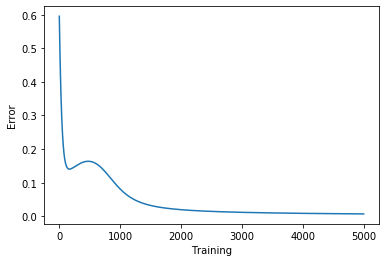

In [13]:
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()

In [14]:
single_point = np.array([0,1,0])
result = sigmoid(np.dot(single_point, weights1) + bias1)
result = sigmoid(np.dot(result, weights2) + bias2)
print(result)

[0.99549353]
